# FIFA Dataset Analysis (Web Scraping)

# Importing libraries

In [23]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

# Performing the Data Scraping from the Web

Link: https://sofifa.com/players?offset=[1-10]

In [38]:
url = f'https://sofifa.com/players?offset={i}'
req = requests.get(url)

In [39]:
# Checking the status code
req

<Response [200]>

In [40]:
soup = BeautifulSoup(req.content)

In [41]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Players FIFA 22 Oct 22, 2021 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 22 player ratings on Oct 22, 2021" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2021 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link href="https://cdn.sofifa.com" rel="preconnect"/>\n  <link href="https://cdn.sofifa.com" rel="dns-prefetch"/>\n  <link href="https://pagead2.googlesyndication.com" rel="preconnect"/>\n  <link href="https://pagead2.googlesyndication.com" rel="dns-prefetch"/>\n  <script async="" crossorigin="anonymous" src="https://pagead2.googl

# Data Exploration, Data Cleaning, Data Manipulation

In [42]:
columns = ['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 
           'Duration', 'Value', 'Wage', 'Total_stats', 'Hits']

In [56]:
def  fifa_datset():
  fifa_final = pd.DataFrame()

  for i in range(1,11):
    url = f'https://sofifa.com/players?offset={i}'
    url = url+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(11)]

    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
      Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
      OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
      POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
      Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
      Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
      Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
      Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)
      lists[10].append(Hits)

    fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                      'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                      'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                      'Total_stats':lists[9], 'Hits':lists[10]})
    
    fifa.drop(0, inplace=True)
    
    fifa['Age'] = pd.to_numeric(fifa['Age'])
    fifa['OVA'] = pd.to_numeric(fifa['OVA'])
    fifa['POT'] = pd.to_numeric(fifa['POT'])
    fifa['Value'] = pd.to_numeric(fifa['Value'])
    fifa['Wage'] = pd.to_numeric(fifa['Wage'])
    fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
    # fifa['Hits'] = pd.to_numeric(fifa['Hits'])

    fifa_final = fifa_final.append(fifa, ignore_index = True)
  
  return fifa_final

In [48]:
fifa_final = pd.DataFrame()

for i in range(1,11):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(11)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
    Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)
    lists[10].append(Hits)

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9], 'Hits':lists[10]})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
  # fifa['Hits'] = pd.to_numeric(fifa['Hits'])

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [57]:
fifa_600 = fifa_final
fifa_598 = fifa_datset()

In [58]:
print(fifa_600.shape)
fifa_598.shape

(600, 11)


(600, 11)

In [59]:
print(fifa_600.columns)
fifa_598.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats', 'Hits'],
      dtype='object')


Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats', 'Hits'],
      dtype='object')

In [60]:
fifa_598.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
Hits           0
dtype: int64

In [61]:
fifa_600.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
Hits           0
dtype: int64

In [62]:
pd.concat([fifa_600,fifa_598]).drop_duplicates(keep=False)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
0,https://cdn.sofifa.com/players/233/934/22_120.png,Aaron Ramsdale,23,77,83,Arsenal,2021 ~ 2025,13.5,43,1303,None
529,https://cdn.sofifa.com/players/260/592/22_120.png,Benjamin Šeško,18,68,86,FC Red Bull Salzburg,2021 ~ 2026,3.1,5,1745,None
530,https://cdn.sofifa.com/players/228/702/22_120.png,Frenkie de Jong,24,87,92,FC Barcelona,2019 ~ 2026,119.5,210,2229,None
531,https://cdn.sofifa.com/players/246/045/22_120.png,Pedro De la Vega,20,74,86,Club Atlético Lanús,2018 ~ 2023,10.0,13,1984,None
532,https://cdn.sofifa.com/players/246/420/22_120.png,Jérémy Doku,19,77,87,Stade Rennais FC,2020 ~ 2025,23.0,29,1810,None
...,...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/257/399/22_120.png,Wahid Faghir,17,64,84,VfB Stuttgart,2021 ~ 2026,1.6,1,1537,None
596,https://cdn.sofifa.com/players/258/315/21_120.png,Bright Akwo Arrey-Mbi,17,62,85,FC Bayern München II,2020 ~ 2022,1.2,500,1495,None
597,https://cdn.sofifa.com/players/259/868/22_120.png,Pape Matar Sarr,18,70,82,FC Metz,"Jun 30, 2022",3.7,14,1829,None
598,https://cdn.sofifa.com/players/261/374/22_120.png,Lewis Bate,18,63,84,Leeds United,2021 ~ 2024,1.5,4,1691,None


In [63]:
fifa_600.iloc[-1]

Image_link     https://cdn.sofifa.com/players/232/656/22_120.png
Name                                              Theo Hernández
Age                                                           23
OVA                                                           84
POT                                                           90
Team                                                    AC Milan
Duration                                             2019 ~ 2024
Value                                                       62.5
Wage                                                          51
Total_stats                                                 2185
Hits                                                        None
Name: 599, dtype: object

In [64]:
fifa_598.iloc[-1]

Image_link     https://cdn.sofifa.com/players/262/641/22_120.png
Name                                        Djibril Fandje Touré
Age                                                           18
OVA                                                           60
POT                                                           83
Team                                                     Watford
Duration                                             2021 ~ 2026
Value                                                        775
Wage                                                           3
Total_stats                                                 1442
Hits                                                        None
Name: 599, dtype: object

In [65]:
fifa_600['Age'].equals(fifa_598['Age'])

False

In [66]:
fifa_600

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Hits
0,https://cdn.sofifa.com/players/233/934/22_120.png,Aaron Ramsdale,23,77,83,Arsenal,2021 ~ 2025,13.5,43,1303,None
1,https://cdn.sofifa.com/players/241/096/22_120.png,Sandro Tonali,21,78,87,AC Milan,2021 ~ 2026,30.0,26,2108,None
2,https://cdn.sofifa.com/players/232/756/22_120.png,Fikayo Tomori,23,80,86,AC Milan,2021 ~ 2025,30.0,37,1802,None
3,https://cdn.sofifa.com/players/235/805/22_120.png,Federico Chiesa,23,84,91,Juventus,"Jun 1, 2022",84.5,81,2064,None
4,https://cdn.sofifa.com/players/232/938/22_120.png,Takehiro Tomiyasu,22,76,86,Arsenal,2021 ~ 2026,16.0,52,1779,None
...,...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/251/570/22_120.png,Rayan Cherki,17,73,88,Olympique Lyonnais,2019 ~ 2023,7.0,9,1712,None
596,https://cdn.sofifa.com/players/020/801/22_120.png,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,2021 ~ 2023,45.0,270,2207,None
597,https://cdn.sofifa.com/players/235/790/22_120.png,Kai Havertz,22,84,92,Chelsea,2020 ~ 2025,94.5,130,2038,None
598,https://cdn.sofifa.com/players/158/023/22_120.png,Lionel Messi,34,93,93,Paris Saint-Germain,2021 ~ 2023,78.0,320,2219,None


In [67]:
fifa_600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
 10  Hits         600 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 51.7+ KB


In [68]:
# Removing Columns - Image_link & Duration
fifa_600.drop(['Image_link','Duration'],inplace = True,axis=1)

In [69]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Aaron Ramsdale,23,77,83,Arsenal,13.5,43,1303,None
1,Sandro Tonali,21,78,87,AC Milan,30.0,26,2108,None
2,Fikayo Tomori,23,80,86,AC Milan,30.0,37,1802,None
3,Federico Chiesa,23,84,91,Juventus,84.5,81,2064,None
4,Takehiro Tomiyasu,22,76,86,Arsenal,16.0,52,1779,None
...,...,...,...,...,...,...,...,...,...
595,Rayan Cherki,17,73,88,Olympique Lyonnais,7.0,9,1712,None
596,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2207,None
597,Kai Havertz,22,84,92,Chelsea,94.5,130,2038,None
598,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219,None


In [70]:
fifa_600.head(20)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Aaron Ramsdale,23,77,83,Arsenal,13.5,43,1303,None
1,Sandro Tonali,21,78,87,AC Milan,30.0,26,2108,None
2,Fikayo Tomori,23,80,86,AC Milan,30.0,37,1802,None
3,Federico Chiesa,23,84,91,Juventus,84.5,81,2064,None
4,Takehiro Tomiyasu,22,76,86,Arsenal,16.0,52,1779,None
5,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2107,None
6,Gabriel dos S. Magalhães,23,80,86,Arsenal,30.0,69,1714,None
7,Niklas Süle,25,83,88,FC Bayern München,48.0,85,1735,None
8,Tammy Abraham,23,79,86,Roma,35.5,54,1788,None
9,Lisandro Martínez,23,80,86,Ajax,30.0,17,2081,None


In [71]:
fifa_600.tail(9)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
591,Manuel Akanji,25,81,84,Borussia Dortmund,30.5,58,1949,None
592,Federico Valverde,22,83,89,Real Madrid CF,58.0,160,2175,None
593,Martin Ødegaard,22,82,88,Arsenal,49.0,89,2090,None
594,Eduardo Camavinga,18,78,89,Real Madrid CF,29.5,44,2089,None
595,Rayan Cherki,17,73,88,Olympique Lyonnais,7.0,9,1712,None
596,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2207,None
597,Kai Havertz,22,84,92,Chelsea,94.5,130,2038,None
598,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219,None
599,Theo Hernández,23,84,90,AC Milan,62.5,51,2185,None


In [72]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,22.771667,78.411667,85.660000,56.592500,62.088333,1927.421667
std,4.631625,5.460637,4.448676,130.096665,76.765609,181.888977
min,16.000000,61.000000,64.000000,3.000000,3.000000,1296.000000
25%,20.000000,76.000000,84.000000,15.500000,18.000000,1794.000000
50%,22.000000,79.000000,86.000000,29.000000,40.000000,1952.000000
75%,24.000000,82.000000,88.000000,45.500000,81.000000,2048.750000
max,39.000000,93.000000,95.000000,850.000000,500.000000,2240.000000


1. Find the name of the player who is having the highest wage.

In [73]:
fifa_600[fifa_600['Wage']==max(fifa_600['Wage'])]['Name']

45     Adam Hložek
104    Adam Hložek
163    Adam Hložek
222    Adam Hložek
281    Adam Hložek
340    Adam Hložek
399    Adam Hložek
458    Adam Hložek
517    Adam Hložek
576    Adam Hložek
Name: Name, dtype: object

2. Duplicate Datas

In [74]:
fifa_600.duplicated().sum(axis=0)

531

In [75]:
fifa_600.drop_duplicates(inplace=True)

In [76]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,22.913043,78.913043,86.057971,55.772464,66.971014,1930.811594
std,4.733296,5.656176,4.448675,122.724790,80.578418,198.064033
min,16.000000,61.000000,64.000000,3.000000,3.000000,1296.000000
25%,20.000000,76.000000,84.000000,16.000000,20.000000,1794.000000
50%,22.000000,79.000000,86.000000,30.000000,44.000000,1952.000000
75%,24.000000,82.000000,88.000000,46.500000,85.000000,2074.000000
max,39.000000,93.000000,95.000000,850.000000,500.000000,2240.000000


2.1 Find the youngest player

2.2 Find the oldest player

In [77]:
print(fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Age'])

print(fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Age'])

15    Pablo Martín Páez Gavira
Name: Name, dtype: object 15    16
Name: Age, dtype: int64
13    Zlatan Ibrahimović
Name: Name, dtype: object 13    39
Name: Age, dtype: int64


3. List out the Top 10 players according to their POT

In [78]:
fifa_600.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
49,Kylian Mbappé,22,91,95,Paris Saint-Germain,194.0,230,2175,None
5,Erling Haaland,20,88,94,Borussia Dortmund,143.5,110,2107,None
539,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219,None
479,Kai Havertz,22,84,92,Chelsea,94.5,130,2038,None
3,Federico Chiesa,23,84,91,Juventus,84.5,81,2064,None
46,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023,None
419,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2207,None
599,Theo Hernández,23,84,90,AC Milan,62.5,51,2185,None
41,Vinícius José de Oliveira Júnior,20,80,90,Real Madrid CF,46.5,120,1919,None
37,Florian Wirtz,18,79,90,Bayer 04 Leverkusen,37.0,19,1941,None


In [79]:
fifa_600.sort_values(by='POT',ascending=False)['Name'].head(10)

49                        Kylian Mbappé
5                        Erling Haaland
539                        Lionel Messi
479                         Kai Havertz
3                       Federico Chiesa
46                 Pedro González López
419        C. Ronaldo dos Santos Aveiro
599                      Theo Hernández
41     Vinícius José de Oliveira Júnior
37                        Florian Wirtz
Name: Name, dtype: object

4. Create a new DataFrame with the values of columns - Name & POT

In [80]:
new_fifa = fifa_600[['Name','POT']]

In [81]:
new_fifa.head(10)

,Name,POT
0,Aaron Ramsdale,83
1,Sandro Tonali,87
2,Fikayo Tomori,86
3,Federico Chiesa,91
4,Takehiro Tomiyasu,86
5,Erling Haaland,94
6,Gabriel dos S. Magalhães,86
7,Niklas Süle,88
8,Tammy Abraham,86
9,Lisandro Martínez,86


4. Plot a graph - Player's Name V/s Player's POT

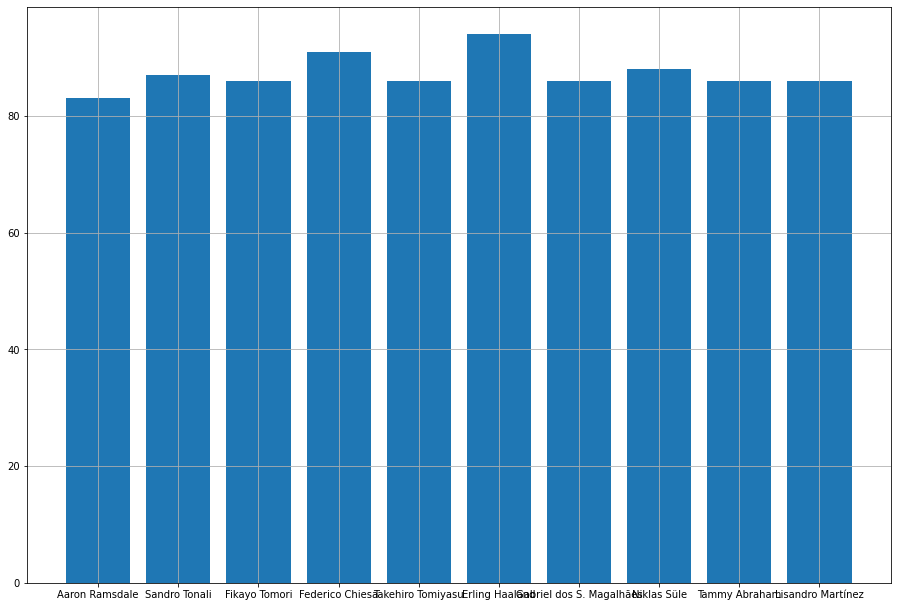

In [82]:
fig = plt.figure()
plt = fig.add_axes([1,1,2,2])

x = new_fifa['Name'].head(10)
y = new_fifa['POT'].head(10)
plt.bar(x,y)
plt.grid()

5. Plot a graph - Player's Name V/s Player's Wage

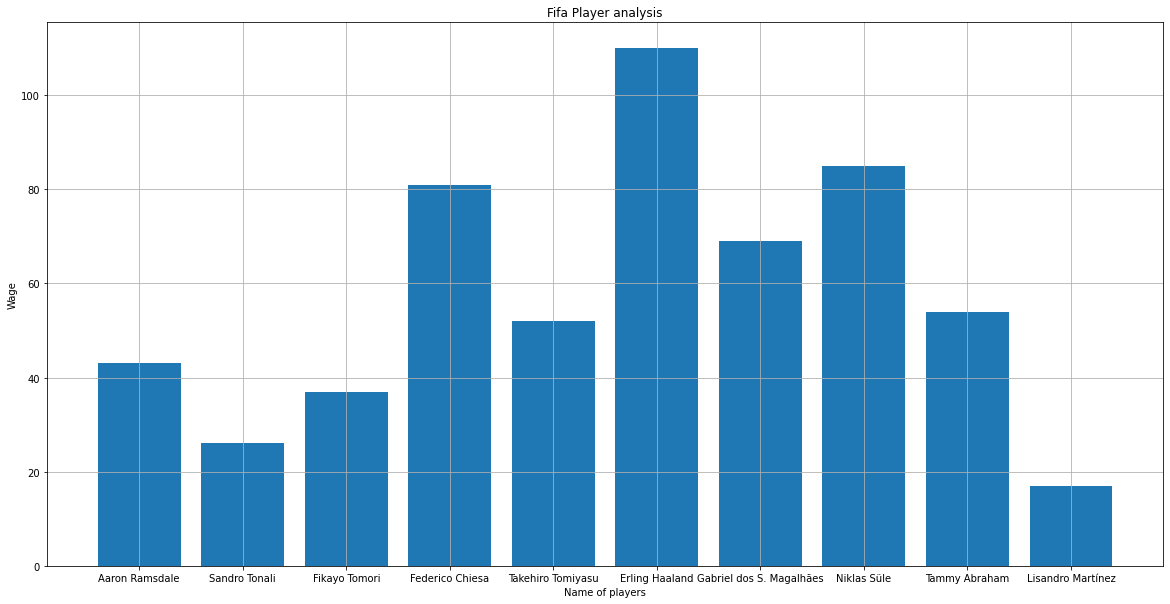

In [83]:
import matplotlib.pyplot as plt


xpoints = fifa_600['Name'][:10]
ypoints = fifa_600['Wage'][:10]
plt.figure(figsize=(20,10))
plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()

6. Find the player who has scored highest number of goals.

In [84]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats,Hits
0,Aaron Ramsdale,23,77,83,Arsenal,13.5,43,1303,None
1,Sandro Tonali,21,78,87,AC Milan,30.0,26,2108,None
2,Fikayo Tomori,23,80,86,AC Milan,30.0,37,1802,None
3,Federico Chiesa,23,84,91,Juventus,84.5,81,2064,None
4,Takehiro Tomiyasu,22,76,86,Arsenal,16.0,52,1779,None
...,...,...,...,...,...,...,...,...,...
359,Rayan Cherki,17,73,88,Olympique Lyonnais,7.0,9,1712,None
419,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2207,None
479,Kai Havertz,22,84,92,Chelsea,94.5,130,2038,None
539,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219,None


In [85]:
fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']

0                    Aaron Ramsdale
1                     Sandro Tonali
2                     Fikayo Tomori
3                   Federico Chiesa
4                 Takehiro Tomiyasu
                   ...             
359                    Rayan Cherki
419    C. Ronaldo dos Santos Aveiro
479                     Kai Havertz
539                    Lionel Messi
599                  Theo Hernández
Name: Name, Length: 69, dtype: object

In [86]:
print(fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name'],fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Hits'])

0                    Aaron Ramsdale
1                     Sandro Tonali
2                     Fikayo Tomori
3                   Federico Chiesa
4                 Takehiro Tomiyasu
                   ...             
359                    Rayan Cherki
419    C. Ronaldo dos Santos Aveiro
479                     Kai Havertz
539                    Lionel Messi
599                  Theo Hernández
Name: Name, Length: 69, dtype: object 0      None
1      None
2      None
3      None
4      None
       ... 
359    None
419    None
479    None
539    None
599    None
Name: Hits, Length: 69, dtype: object


In [87]:
fifa_600[fifa_600['Hits']==max(fifa_600['Hits'])]['Name']

0                    Aaron Ramsdale
1                     Sandro Tonali
2                     Fikayo Tomori
3                   Federico Chiesa
4                 Takehiro Tomiyasu
                   ...             
359                    Rayan Cherki
419    C. Ronaldo dos Santos Aveiro
479                     Kai Havertz
539                    Lionel Messi
599                  Theo Hernández
Name: Name, Length: 69, dtype: object

7. Find all the players whose Potential is more than equal to 90

In [88]:
fifa_600[fifa_600['POT']>=90]['Name']

3                       Federico Chiesa
5                        Erling Haaland
24                     Ryan Gravenberch
26               Trent Alexander-Arnold
27                       Anssumane Fati
37                        Florian Wirtz
41     Vinícius José de Oliveira Júnior
46                 Pedro González López
49                        Kylian Mbappé
419        C. Ronaldo dos Santos Aveiro
479                         Kai Havertz
539                        Lionel Messi
599                      Theo Hernández
Name: Name, dtype: object

8. Find all the players whose Potential is more than 90 and the age < 20

In [89]:
fifa_600[(fifa_600['POT']>90) & (fifa_600['Age']<20) ]['Name']

46    Pedro González López
Name: Name, dtype: object

7. Find all the players whose values >10 but wage <50

In [90]:
fifa_600[(fifa_600['Value']>10) & (fifa_600['Wage']<50)]['Name']

0                 Aaron Ramsdale
1                  Sandro Tonali
2                  Fikayo Tomori
9              Lisandro Martínez
10             Noussair Mazraoui
13            Zlatan Ibrahimović
14           Alexis Saelemaekers
16              Emile Smith Rowe
17      Rafael da Conceição Leão
18               Davide Calabria
19               Steven Berghuis
24              Ryan Gravenberch
25               Jude Bellingham
27                Anssumane Fati
31                 Conor McAleny
32                Jurriën Timber
33                     Luis Díaz
34                Daniel Maldini
35                  Noni Madueke
36           Aurélien Tchouaméni
37                 Florian Wirtz
38               Mauro Arambarri
39     Antony Matheus dos Santos
43                Julián Álvarez
44                   Boulaye Dia
47                 Jamal Musiala
53             Giacomo Raspadori
57             Alessio Romagnoli
59                Joško Gvardiol
299            Eduardo Camavinga
Name: Name

Conclusion: 

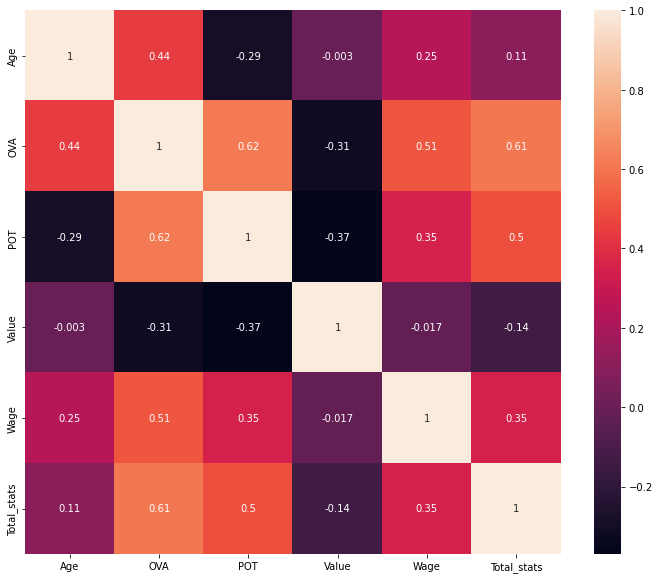

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_600.corr(), annot=True)

In [92]:
fifa_600.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.442444,-0.291683,-0.002976,0.246993,0.114618
OVA,0.442444,1.000000,0.619122,-0.313452,0.514933,0.611712
POT,-0.291683,0.619122,1.000000,-0.369638,0.351994,0.496872
Value,-0.002976,-0.313452,-0.369638,1.000000,-0.017483,-0.138108
Wage,0.246993,0.514933,0.351994,-0.017483,1.000000,0.349623
Total_stats,0.114618,0.611712,0.496872,-0.138108,0.349623,1.000000
